## Латиков Александр, вариант 5, задача 8.11.5

Задача - необходимо решить систему уравнений:

x' = -sig(x - y)

y' = -xz + rx - y

z' = xy - bz

Начальные условия: x(0) = y(0) = z(0) = 1

b = 8 / 3, sig = 10, r = 28, 0 <= t <= 50

Для решения задачи используются методы Рунге-Кутты 1-4 порядков

In [1]:
import numpy as np              
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
bi = 8.0 / 3.0
sig = 10.0
r = 28.0
h = 0.001
t = 50.0
y0 = np.array([1.0, 1.0, 1.0])

def f(y):
    y1 = np.copy(y)
    y1[0] = -sig * (y[0] - y[1])
    y1[1] = (-1) * y[0] * y[2] + r * y[0] - y[1]
    y1[2] = y[0] * y[1] - bi * y[2]
    return y1

In [3]:
def step(yn):
    k = np.arange(b.size * yn.size, dtype = float).reshape(b.size, yn.size)
    for i in range(b.size):
        yi = np.copy(yn)
        for j in range(i):
            yi += h * a[i][j] * k[j] 
        k[i] = f(np.copy(yi))
    y_old = np.copy(yn)
    for i in range(b.size):
        yn += h * b[i] * k[i]
    ##d = 0
    ##for i in range (yn.size):
    ##    d += (yn[i] - y_old[i]) ** 2
    ##print(d)
    return yn

Таблицы Бутчера взяты из учебника за авторством И.Б.Петрова и А.И.Лобанова

In [4]:
##первый порядок аппроксимации
b = np.array([1.0])
c = np.array([0.0])
a = np.array([
        np.array([0.0])
])

In [16]:
##второй порядок аппроксимации
b = np.array([0.0, 1.0])
c = np.array([0.0, 0.5])
a = np.array([
        np.array([0.0, 0.0]),
        np.array([0.5, 0.0])
])

In [19]:
##третий порядок аппроксимации
b = np.array([1.0 / 6.0, 2.0 / 3.0, 1.0 / 6.0])
c = np.array([0.0, 0.5, 1.0])
a = np.array([
        np.array([0.0, 0.0, 0.0]),
        np.array([0.5, 0.0, 0.0]),
        np.array([0.0, 1.0, 0.0])
])

In [22]:
##четвертый порядок аппроксимации
b = np.array([1.0 / 6.0, 1.0 / 3.0, 1.0 / 3.0, 1.0 / 6.0])
c = np.array([0.0, 0.5, 0.5, 1.0])
a = np.array([
        np.array([0.0, 0.0, 0.0, 0.0]),
        np.array([0.5, 0.0, 0.0, 0.0]),
        np.array([0.0, 0.5, 0.0, 0.0]),
        np.array([0.0, 0.0, 1.0, 0.0])
])

In [23]:
y_trace = np.array([np.copy(y0)])
for i in range(round(t / h)):
    y_trace = np.append(y_trace, [step(np.copy(y_trace[i]))], axis = 0)
for i in range(y_trace.size // 3):
    if(i % 100 == 0):
        print(y_trace[i])

[1. 1. 1.]
[2.13310762 4.47142018 1.11389889]
[ 6.54252755 13.73118671  4.18019741]
[16.68481396 27.18349235 26.20646018]
[15.36620011  1.11303753 46.75784334]
[ 1.19827299 -8.86719773 32.45474023]
[-4.83321401 -8.06128111 26.67318955]
[-7.04936183 -8.7474865  24.89008216]
[ -8.6355093  -10.09563918  25.64672605]
[ -9.69220069 -10.15778173  28.03033906]
[-9.37857001 -8.35703379 29.36232533]
[-8.07861859 -6.77019936 28.18342435]
[-7.17339714 -6.78342378 25.97599215]
[-7.36206031 -8.09977411 24.55428241]
[-8.48479326 -9.84967704 25.08112225]
[ -9.67232428 -10.43194463  27.51743363]
[-9.64389509 -8.80862231 29.44101522]
[-8.34628633 -6.87301663 28.67062019]
[-7.19910069 -6.53617872 26.37594711]
[-7.14634299 -7.69458546 24.573314  ]
[-8.17349993 -9.56202368 24.62070205]
[ -9.54096363 -10.62853973  26.90562089]
[-9.87110396 -9.3292964  29.37932605]
[-8.66712917 -7.08277214 29.15916835]
[-7.28919088 -6.33213095 26.86518988]
[-6.9595736  -7.27246924 24.70312218]
[-7.83460909 -9.17965125 24.22

[-5.65264273 -8.88729025 16.54281123]
[ -9.98883752 -15.10823083  21.12799703]
[-13.68162325 -14.23232803  33.32750257]
[-10.07295392  -3.7745611   35.20860617]
[-4.55124742 -0.64285567 28.00970926]
[-2.32375689 -1.47716269 21.70760281]
[-2.36826651 -3.18616005 17.07233252]
[-3.98935284 -6.54406985 14.39181853]
[ -7.84640658 -13.11995253  16.12272022]
[-13.56287669 -18.10492684  28.39926343]
[-12.90320045  -6.81284945  38.30537725]
[-5.64798419  0.62703143 31.20797906]
[-1.59508961  0.55634932 23.68116321]
[-0.47899028 -0.06254042 18.1173491 ]
[-0.37368405 -0.49440324 13.88590246]
[-0.68050082 -1.20324713 10.67312788]
[-1.57611502 -2.98426084  8.3743851 ]
[-3.97092352 -7.71452733  7.67148949]
[ -9.90496266 -18.18822047  13.79757088]
[-17.22504376 -19.2201433   37.41967061]
[-10.12274667   1.93317377  39.37386846]
[-0.79983737  5.0433198  28.49411196]
[ 2.824876    5.098342   22.42376963]
[ 4.98454683  7.41905422 19.31825558]
[ 8.12218912 11.96919507 20.42119919]
[11.87342238 14.5983787

In [7]:
%matplotlib notebook

<IPython.core.display.Javascript object>


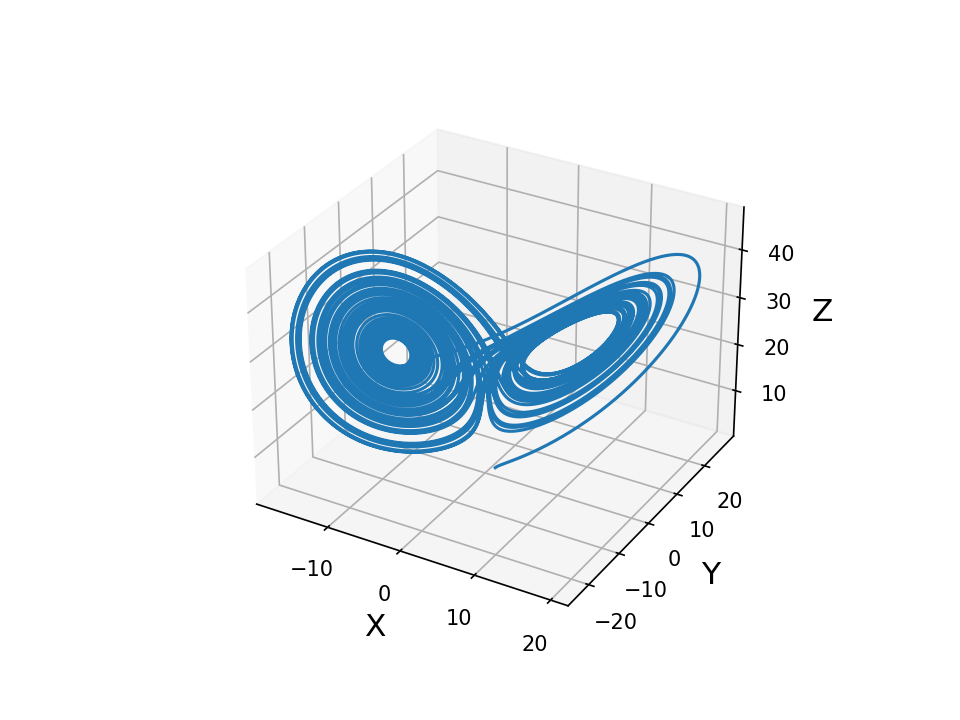

In [24]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(y_trace[:, 0], y_trace[:, 1], y_trace[:, 2], label='solution')
ax.set_xlabel("X", fontsize=15)
ax.set_ylabel("Y", fontsize=15)
ax.set_zlabel("Z", fontsize=15)
plt.draw()
plt.show()

Результаты решения диффура с шагом h = 0.001 для 1-4 порядка апроксимации выложены в 1-4.txt. Для краткости выведен только каждый 100-ый отсчет.
Визуализация решения представлена в 1-4.png, если надо посмотреть с разных сторон, то можно покрутить модель в .ipynb

Устойчивых положений равновесия у уравнения нет, для разных методов можно наблюдать значительное расхождение на дистанции t = 50. Отсутствие положений равновесия и хаотичность решения подтверждается здесь: https://en.wikipedia.org/wiki/Lorenz_system .